In [217]:
import time

import cv2
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

In [868]:
def show(image):
    plt.imshow(image, cmap='gray')
    _ = plt.axis('off')
    plt.show()

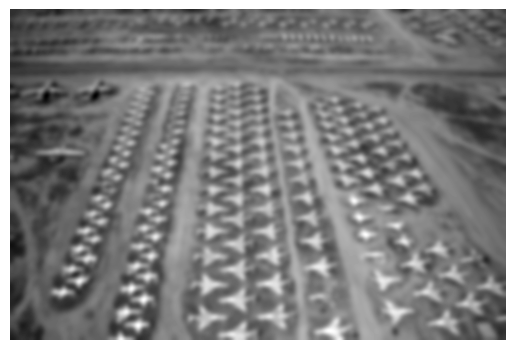

In [966]:
image_orig = cv2.imread('./images/image1.jpg')
image = cv2.cvtColor(image_orig, cv2.COLOR_BGR2GRAY)
image = cv2.GaussianBlur(image, (31, 31), 0)
show(image)

### Canny edge detection

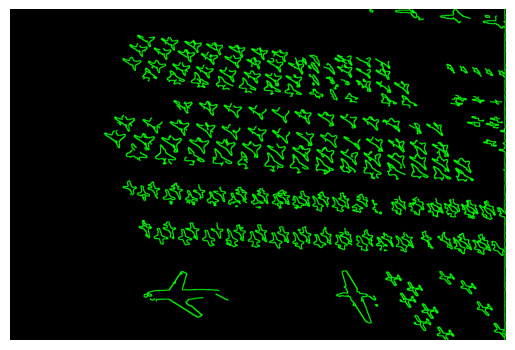

Approximate number of planes
on the image: 334


In [957]:
image_orig = cv2.imread('./images/image2.jpg')
image = cv2.cvtColor(image_orig, cv2.COLOR_BGR2GRAY)
image = cv2.GaussianBlur(image, (5, 5), 0)
image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8))

edges = cv2.Canny(image, 120, 350)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# create a blank mask to store the segmented objects
mask = np.zeros_like(image_orig)
fill_color = (0, 255, 0)

cv2.drawContours(mask, contours, -1, fill_color, 2)
show(mask)
print(f'Approximate number of planes\non the image: {len(contours)}')

### Otsu

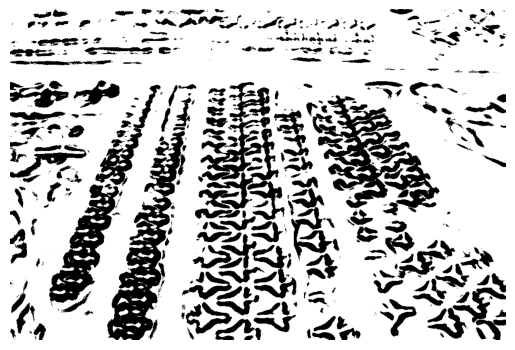

In [967]:
se = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 6))
bg = cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
out_gray = cv2.divide(image, bg, scale=255)
out_binary = cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU)[1]
show(out_binary)

### Blurring and subtracting

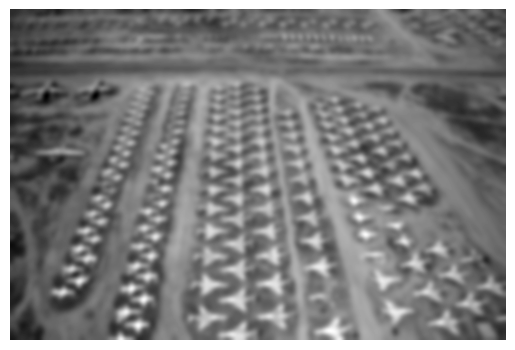

In [968]:
blurred = cv2.GaussianBlur(image, (9, 9), 0)
show(blurred)

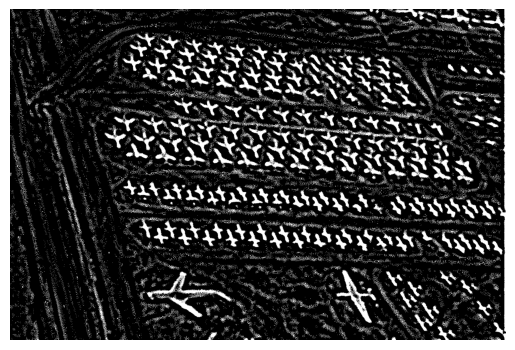

In [963]:
show(blurred - image)

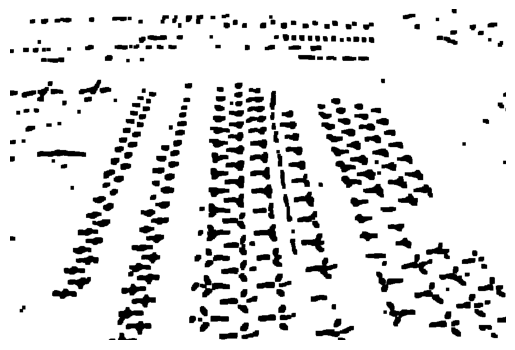

In [969]:
gauss_contours = blurred - image
processed = cv2.dilate(cv2.erode(gauss_contours, np.ones((3, 3), np.uint8), iterations=2), np.ones((2, 2), np.uint8), iterations=6)
_, thresh = cv2.threshold(processed, 127, 255, cv2.THRESH_BINARY_INV)
show(thresh)

### Trying algorithtms

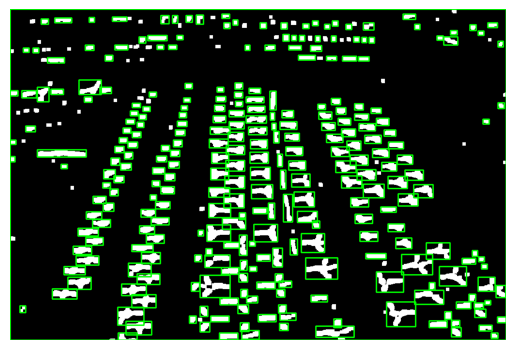

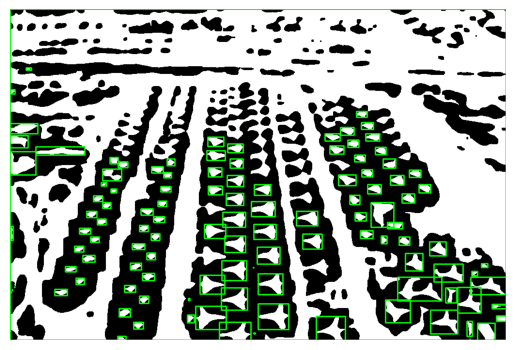

In [974]:
gauss_contours = blurred - image

# Opening
erosion = cv2.erode(gauss_contours, np.ones((3, 3), np.uint8), iterations=2)
dilation = cv2.dilate(erosion, np.ones((2, 2), np.uint8), iterations=6)
_, thresh = cv2.threshold(processed, 127, 255, cv2.THRESH_BINARY)

_, labels, stats, _ = cv2.connectedComponentsWithStats(thresh, 8)
mask = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
for stat in stats:
    x, y, w, h, area = stat  #
    if area > 100:
        cv2.rectangle(mask, (x, y), (x+w, y+h), (0, 255, 0), 2)
show(mask)

# Find contours
# contours, _ = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# print(f'Approximate number of planes: {len(contours)}')
#show(dilation)

# mask = np.zeros_like(image_orig)
# for contour in contours:
#     num1 = np.random.randint(0, 255)
#     num2 = np.random.randint(0, 255 - num1)
#     fill_color = (num1, num2, 255 - num1 - num2)
#     cv2.drawContours(mask, [contour], 0, fill_color, -1)

#blur = cv2.GaussianBlur(image, (5, 5), 0)
#image = cv2.divide(image, blur, scale=255)
se = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 40))
bg = cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
#bg = cv2.morphologyEx(bg, cv2.MORPH_GRADIENT, kernel)
out_gray = cv2.divide(image, bg, scale=255)
out_binary = cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU)[1]
dilated = cv2.erode(out_binary, np.ones((3, 3), np.uint8), iterations=1)
#show(out_binary)

_, labels, stats, _ = cv2.connectedComponentsWithStats(dilated, 8)
mask = cv2.cvtColor(dilated, cv2.COLOR_GRAY2RGB)
for stat in stats:
    x, y, w, h, area = stat  #
    cv2.rectangle(mask, (x, y), (x+w, y+h), (0, 255, 0), 2)
show(mask)

### Experiments with different augmentations

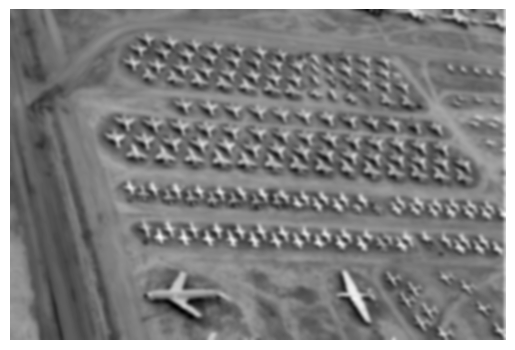

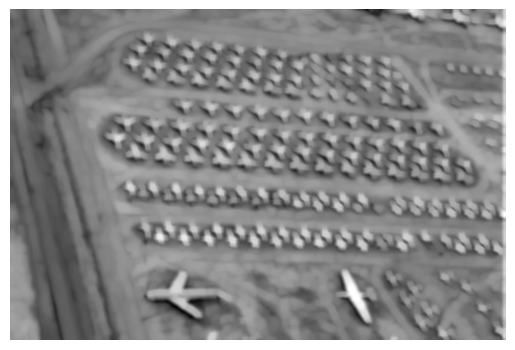

In [942]:
opened = cv2.morphologyEx(blurred, cv2.MORPH_OPEN, np.ones((7, 7), np.uint8))
show(image)
closed = cv2.dilate(opened, np.ones((3, 3), np.uint8), iterations=2)
show(closed)

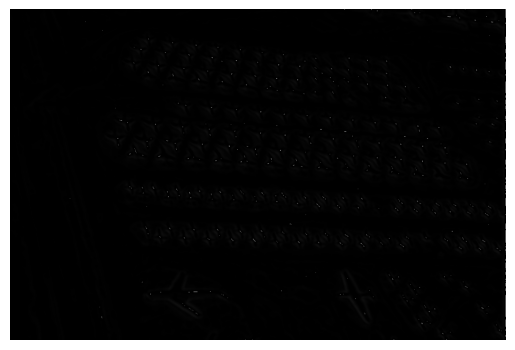

In [943]:
kernel_dilate = np.ones((3, 3), np.uint8)
kernel_erode = np.ones((3, 3), np.uint8)
contours = cv2.erode(cv2.dilate(blurred, kernel_dilate, iterations=1) - image, kernel_erode, iterations=1)
show(contours)

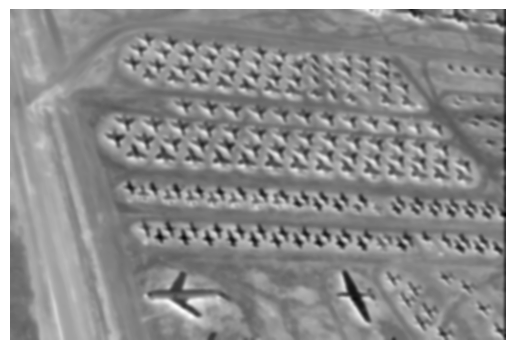

In [944]:
contours = cv2.erode(cv2.dilate(contours, kernel_dilate, iterations=1) - image, kernel_erode, iterations=1)
show(contours)

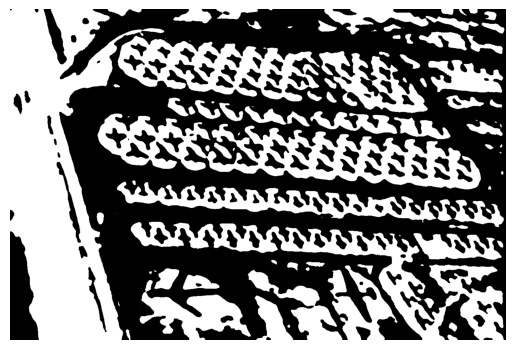

In [945]:
_, thresh = cv2.threshold(contours, 0, 255, cv2.THRESH_OTSU)
show(thresh)

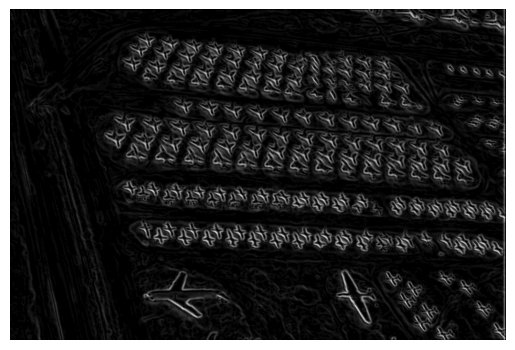

In [135]:
kernel_dilate = np.ones((3, 3), np.uint8)
kernel_erode = np.ones((3, 3), np.uint8)
contours = cv2.erode(cv2.dilate(image, kernel_dilate, iterations=1) - image, kernel_erode, iterations=1)
show(contours)

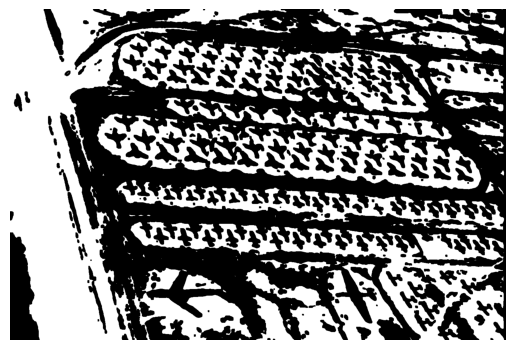

In [164]:
_, th = cv2.threshold(contours, np.mean(contours) * 1, 255, cv2.THRESH_BINARY)
show(cv2.erode(th, np.ones((2, 2), np.uint8), iterations=1))